In [244]:
import numpy as np
import os
from skimage.measure import block_reduce
from scipy.misc import imread
import cPickle as pkl
import scipy.signal
import numpy.fft as fft
import sys
import optparse
from libtiff import TIFF
from PIL import Image
import re
import itertools
from scipy import ndimage
import pandas as pd
import matplotlib.pyplot as plt

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [384]:
# outdir = '/media/juliana/MAC/data/JR009/20150625b/20150625_JR009_500um_0080Hz/structs'
outdir = '/media/juliana/MAC/data/JR009/20150625_block2/20150625_JR009_500um_0080Hz_blueLED/structs'
# outdir = '/media/juliana/MAC/data/JR009/20150625_block2/20150625_JR009_500um_0080Hz_red2/structs'


reduce_factor = (2, 2)
run_num = str(0)

In [385]:

files = os.listdir(outdir)
files = [f for f in files if os.path.splitext(f)[1] == '.pkl']
dstructs = [f for f in files if 'D_target_FFT' in f and str(reduce_factor) in f]
if not dstructs:
    dstructs = [f for f in files if 'D_' in f and str(reduce_factor) in f] # address older analysis formats

print dstructs

D = dict()
for f in dstructs:
    outfile = os.path.join(outdir, f)
    with open(outfile,'rb') as fp:
        D[f] = pkl.load(fp)
# close

# MATCH ELEV vs. AZIM conditions:
ftmap = dict()
outshape = D[D.keys()[0]]['ft_real'].shape
for curr_key in D.keys():
    print curr_key, outshape
    # reals = D[curr_key]['ft_real'].ravel()
    # imags = D[curr_key]['ft_imag'].ravel()
    # if 'Down' in curr_key:
    #     imags = imags*-1
    # if 'Right' in curr_key:
    #     imags = imags*-1
    # ftmap[curr_key] = [complex(x[0], x[1]) for x in zip(reals, imags)]
    # ftmap[curr_key] = np.reshape(np.array(ftmap[curr_key]), outshape)
    if "Left" in curr_key:
        leftmap = D[curr_key]['ft']
    elif "Right" in curr_key:
        rightmap = D[curr_key]['ft']
    elif "Down" in curr_key:
        downmap = D[curr_key]['ft']
#     elif "Up" in curr_key and "00" in curr_key:
    elif "Up" in curr_key and "_00" not in curr_key:
        upmap = D[curr_key]['ft']

['D_target_FFT_H-Up_0_(2, 2)_.pkl', 'D_target_FFT_H-Down_0_(2, 2)_.pkl', 'D_target_FFT_V-Left_0_(2, 2)_.pkl', 'D_target_FFT_V-Right_0_(2, 2)_.pkl']
D_target_FFT_V-Right_0_(2, 2)_.pkl (123, 164)
D_target_FFT_H-Down_0_(2, 2)_.pkl (123, 164)
D_target_FFT_V-Left_0_(2, 2)_.pkl (123, 164)
D_target_FFT_H-Up_0_(2, 2)_.pkl (123, 164)


In [386]:
# upkey = [k for k in D.keys() if 'H' in k and '_'+'00' in k and 'Up' in k and '00' in k][0]
upkey = [k for k in D.keys() if 'H' in k and '_'+run_num+'_' in k and 'Up' in k][0]

downkey = [k for k in D.keys() if 'H' in k and '_'+run_num in k and 'Down' in k][0]

leftkey = [k for k in D.keys() if 'V' in k and '_'+run_num in k and 'Left' in k][0]
rightkey = [k for k in D.keys() if 'V' in k and '_'+run_num in k and 'Right' in k][0]

H_keys = [upkey, downkey]
# V_keys = [leftkey]
V_keys = [leftkey, rightkey]

# print H_keys
# print V_keys
# V_keys = [k for k in ftmap.keys() if 'V' in k and '_'+run_num in k]
# H_keys = [k for k in ftmap.keys() if 'H' in k and '_'+run_num in k]

# azimuth_phase = (np.angle(ftmap[V_keys[0]]) + np.angle(ftmap[V_keys[1]])) / 2. #* (180./math.pi)
# elevation_phase = (np.angle(ftmap[H_keys[0]]) + np.angle(ftmap[H_keys[1]])) / 2.  #* (180./math.pi)

print "AZ keys: ", V_keys
print "EL keys: ", H_keys

AZ keys:  ['D_target_FFT_V-Left_0_(2, 2)_.pkl', 'D_target_FFT_V-Right_0_(2, 2)_.pkl']
EL keys:  ['D_target_FFT_H-Up_0_(2, 2)_.pkl', 'D_target_FFT_H-Down_0_(2, 2)_.pkl']


In [387]:
import math
%matplotlib inline

# azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
# elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.
print curr_key, D[curr_key]['mag_map']

D_target_FFT_H-Up_0_(2, 2)_.pkl [[  3.24399681e+03   4.02366631e+03   1.59669758e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.66353507e+03   1.51778096e+03   2.50558504e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.53675452e+03   2.70828233e+03   3.20049056e+03 ...,   1.44650190e+02
    1.50000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [388]:
# MAKE LEGENDS:

# winsize = [1920, 1200]
# screen_size = [int(i*0.25) for i in winsize]
# print screen_size
# screen_legend = np.zeros((screen_size[1], screen_size[0]))

# left = 1
# if left:
#     # First, set half the screen width (0 to 239 = to 0 to -pi)
#     nspaces_start = np.linspace(0, -1*math.pi, screen_size[0]/2)
#     for i in range(screen_size[1]):
#         screen_legend[i][0:screen_size[0]/2] = nspaces_start
#     # Then, set right side of screen (240 to end = to pi to 0)
#     nspaces_end = np.linspace(1*math.pi, 0, screen_size[0]/2)
#     for i in range(screen_size[1]):
#         screen_legend[i][screen_size[0]/2:] = nspaces_end
# else:
#     # First, set half the screen width (0 to 239 = to 0 to -pi)
#     nspaces_start = np.linspace(0, 1*math.pi, screen_size[0]/2)
#     for i in range(screen_size[1]):
#         screen_legend[i][0:screen_size[0]/2] = nspaces_start
#     # Then, set right side of screen (240 to end = to pi to 0)
#     nspaces_end = np.linspace(-1*math.pi, 0, screen_size[0]/2)
#     for i in range(screen_size[1]):
#         screen_legend[i][screen_size[0]/2:] = nspaces_end
        
winsize = [1920, 1200]
screen_size = [int(i*0.25) for i in winsize]
print screen_size

V_left_legend = np.zeros((screen_size[1], screen_size[0]))
# First, set half the screen width (0 to 239 = to 0 to -pi)
nspaces_start = np.linspace(0, -1*math.pi, screen_size[0]/2)
for i in range(screen_size[1]):
    V_left_legend[i][0:screen_size[0]/2] = nspaces_start
    
# Then, set right side of screen (240 to end = to pi to 0)
nspaces_end = np.linspace(1*math.pi, 0, screen_size[0]/2)
for i in range(screen_size[1]):
    V_left_legend[i][screen_size[0]/2:] = nspaces_end

V_right_legend = np.zeros((screen_size[1], screen_size[0]))
# First, set half the screen width (0 to 239 = to 0 to -pi)
nspaces_start = np.linspace(0, 1*math.pi, screen_size[0]/2)
for i in range(screen_size[1]):
    V_right_legend[i][0:screen_size[0]/2] = nspaces_start
# Then, set right side of screen (240 to end = to pi to 0)
nspaces_end = np.linspace(-1*math.pi, 0, screen_size[0]/2)
for i in range(screen_size[1]):
    V_right_legend[i][screen_size[0]/2:] = nspaces_end
        
H_down_legend = np.zeros((screen_size[1], screen_size[0]))
# First, set half the screen width (0 to 239 = to 0 to -pi)
nspaces_start = np.linspace(0, -1*math.pi, screen_size[1]/2)
for i in range(screen_size[0]):
    H_down_legend[0:screen_size[1]/2, i] = nspaces_start

# Then, set right side of screen (240 to end = to pi to 0)
nspaces_end = np.linspace(1*math.pi, 0, screen_size[1]/2)
for i in range(screen_size[0]):
    H_down_legend[screen_size[1]/2:, i] = nspaces_end

H_up_legend = np.zeros((screen_size[1], screen_size[0]))
# First, set half the screen width (0 to 239 = to 0 to -pi)
nspaces_start = np.linspace(0, 1*math.pi, screen_size[1]/2)
for i in range(screen_size[0]):
    H_up_legend[0:screen_size[1]/2, i] = nspaces_start

# Then, set right side of screen (240 to end = to pi to 0)
nspaces_end = np.linspace(-1*math.pi, 0, screen_size[1]/2)
for i in range(screen_size[0]):
    H_up_legend[screen_size[1]/2:, i] = nspaces_end

    
    
    
    
double_left_legend = np.zeros((screen_size[1], screen_size[0]))

# First, set half the screen width (0 to 239 = to 0 to -pi)
nspaces_start = np.linspace(0, -1*math.pi, screen_size[0]/4)
for i in range(screen_size[1]):
    double_left_legend[i][0:screen_size[0]/4] = nspaces_start
    
# Then, set right side of screen (240 to end = to pi to 0)
nspaces_end = np.linspace(1*math.pi, 0, screen_size[0]/4)
for i in range(screen_size[1]):
    double_left_legend[i][screen_size[0]/4:screen_size[0]/2] = nspaces_end
    
    
nspaces_start = np.linspace(0, -1*math.pi, screen_size[0]/4)
for i in range(screen_size[1]):
    strt = int(screen_size[0]*.5)
    to = int(screen_size[0]*.75)
    double_left_legend[i][strt:to] = nspaces_start
    
# Then, set right side of screen (240 to end = to pi to 0)
nspaces_end = np.linspace(1*math.pi, 0, screen_size[0]/4)
for i in range(screen_size[1]):
    double_left_legend[i][to:] = nspaces_end
    

    
    
double_down_legend = np.zeros((screen_size[1], screen_size[0]))
# First, set half the screen width (0 to 239 = to 0 to -pi)
nspaces_start = np.linspace(0, -1*math.pi, screen_size[1]/4)
for i in range(screen_size[0]):
    double_down_legend[0:screen_size[1]/4, i] = nspaces_start

# Then, set right side of screen (240 to end = to pi to 0)
nspaces_end = np.linspace(1*math.pi, 0, screen_size[1]/4)
for i in range(screen_size[0]):
    double_down_legend[screen_size[1]/4:screen_size[1]/2, i] = nspaces_end
    

nspaces_start = np.linspace(0, -1*math.pi, screen_size[1]/4)
for i in range(screen_size[0]):
    strt = int(screen_size[1]*0.5)
    to = int(screen_size[1]*0.75)
    double_down_legend[strt:to, i] = nspaces_start

# Then, set right side of screen (240 to end = to pi to 0)
nspaces_end = np.linspace(1*math.pi, 0, screen_size[1]/4)
for i in range(screen_size[0]):
    double_down_legend[to:, i] = nspaces_end

[480, 300]


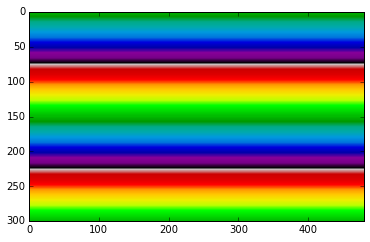

In [389]:
plt.imshow(double_down_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)

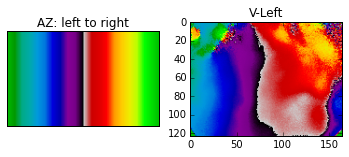

In [390]:
######################################################################
# V-LEFT:
######################################################################
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(V_left_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('AZ: left to right')
fig.add_subplot(1,2,2)
plt.imshow(np.angle(leftmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('V-Left')

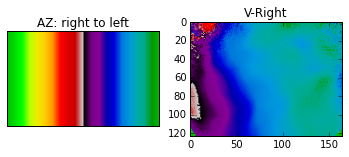

In [391]:
######################################################################
# V-RIGHT:
######################################################################
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(V_right_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('AZ: right to left')
fig.add_subplot(1,2,2)
plt.imshow(np.angle(rightmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('V-Right')

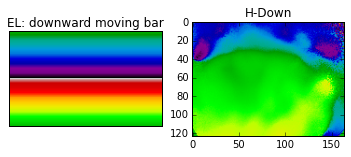

In [392]:
######################################################################
# H-DOWN:
######################################################################
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(H_down_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('EL: downward moving bar')
fig.add_subplot(1,2,2)
plt.imshow(np.angle(downmap), cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title('H-Down')

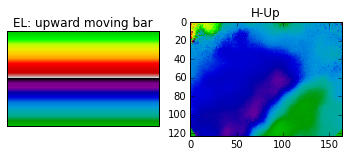

In [393]:
######################################################################
# H-UP:
######################################################################
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(H_up_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('EL: upward moving bar')
fig.add_subplot(1,2,2)
plt.imshow(np.angle(upmap), cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title('H-Up')

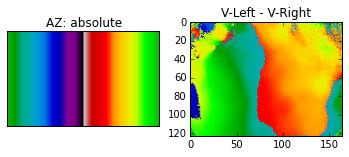

In [394]:
######################################################################
# ABSOLUTE AZIMUTH
######################################################################
# For LEFTMAP - RIGHTMAP, color legend follows LEFT-only map direction:

azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.

# SEE ABOVE COLORBAR
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(V_left_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('AZ: absolute')
fig.add_subplot(1,2,2)
plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('V-Left - V-Right')

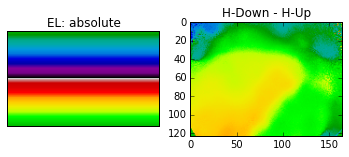

In [395]:
######################################################################
# ABSOLUTE ELEVATION
######################################################################

elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(H_down_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('EL: absolute')
fig.add_subplot(1,2,2)
plt.imshow(elevation_phase, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title('H-Down - H-Up')

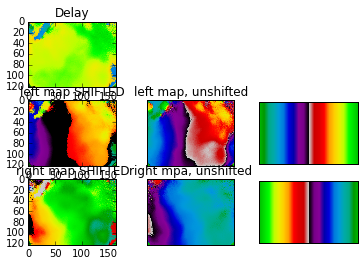

In [398]:
######################################################################
# DELAY VERT:
######################################################################

fig = plt.figure()

# fig.add_subplot(1,3,1)
# # delay_vert = (np.angle(leftmap) + np.angle(rightmap))
# delay_vert = np.angle(leftmap * rightmap) / 2
# plt.imshow(delay_vert, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
# # plt.colorbar()
# plt.title("Delay")

# fig.add_subplot(1,3,2)
# shift_left = np.angle(leftmap.conjugate()) - delay_vert
# plt.imshow(shift_left, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# plt.title('Shift LEFT')


# fig.add_subplot(1,3,3)
# shift_left = np.angle(rightmap.conjugate()) + delay_vert
# plt.imshow(shift_left, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# plt.title('Shift RIGHT')

colormap = 'spectral'

# 1. Delay map
fig.add_subplot(3,3,1)
# delay_vert = (np.angle(leftmap) + np.angle(rightmap)) / 2.
delay_vert = np.angle(leftmap * rightmap) / 2.
plt.imshow(delay_vert, cmap=colormap,  vmin=-1*math.pi, vmax=1*math.pi)
plt.title("Delay")

# 2. blank

# 3. LEFT-map shifted
fig.add_subplot(3,3,4)
# shift_left = np.angle(leftmap.conjugate()) - delay_vert
shift_left = np.angle(leftmap) - delay_vert
plt.imshow(shift_left, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.title('left map SHIFTED')

# 4. LEFT-map relative
ax = fig.add_subplot(3,3,5)
plt.imshow(np.angle(leftmap), cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title('left map, unshifted')

# 5.  LEFT-map LEGEND
ax = fig.add_subplot(3,3,6)
plt.imshow(V_left_legend, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# 6. RIGHT-map shifted
fig.add_subplot(3,3,7)
# shift_right = np.angle(rightmap) - delay_vert
shift_right = np.angle(rightmap.conjugate()) - delay_vert
plt.imshow(shift_right, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.title('right map SHIFTED')

# 7. RIGHT-map relative
ax = fig.add_subplot(3,3,8)
plt.imshow(np.angle(rightmap), cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title('right mpa, unshifted')

# 8. RIGHT-map LEGEND
ax = fig.add_subplot(3,3,9)
plt.imshow(V_right_legend, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

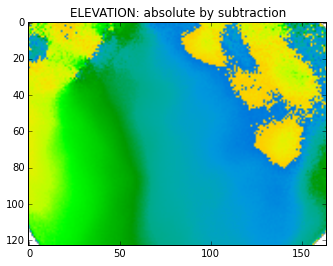

In [367]:
# azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
azimuth_phase = ( np.angle(leftmap / rightmap) ) / 2.

plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute by subtraction')

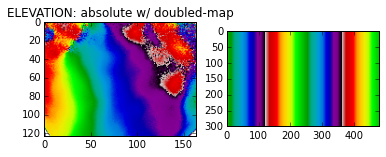

In [368]:
# azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
fig = plt.figure()
fig.add_subplot(1,2,1)
azimuth_phase = np.angle(leftmap / rightmap) 
# azimuth_phase = np.angle(rightmap / leftmap) 

plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute w/ doubled-map')

fig.add_subplot(1,2,2)
plt.imshow(double_left_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)


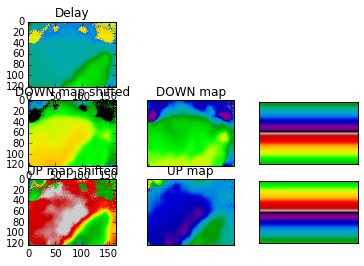

In [369]:
######################################################################
# DELAY HORIZ:
######################################################################

fig = plt.figure()

# 1. Delay map
fig.add_subplot(3,3,1)
# delay_horz = (np.angle(leftmap) + np.angle(rightmap)) / 2.
delay_horz = np.angle(downmap * upmap) / 2.
# delay_horz = np.angle(upmap * downmap) / 2.
# delay_horz = (np.angle(downmap) + np.angle(upmap)) / 2.

plt.imshow(delay_horz, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title("Delay")

# 2. blank

# 3. DOWN-map shifted
fig.add_subplot(3,3,4)
# shift_down = np.angle(downmap.conjugate()) - delay_horz
shift_down = np.angle(downmap) - delay_horz
plt.imshow(shift_down, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('DOWN map shifted')

# 4. DOWN-map relative
ax = fig.add_subplot(3,3,5)
plt.imshow(np.angle(downmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title('DOWN map')

# 5.  Down-map LEGEND
ax = fig.add_subplot(3,3,6)
plt.imshow(H_down_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# 6. UP-map shifted
fig.add_subplot(3,3,7)
shift_up = np.angle(upmap.conjugate()) - delay_horz
# shift_up = delay_horz - np.angle(upmap.conjugate())
plt.imshow(shift_up, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('UP map shifted')

# 7. UP-map relative
ax = fig.add_subplot(3,3,8)
plt.imshow(np.angle(upmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title('UP map')

# 8. UP-map LEGEND
ax = fig.add_subplot(3,3,9)
plt.imshow(H_up_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

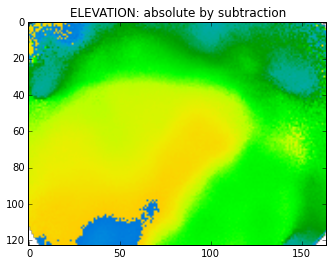

In [370]:
# elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.
elevation_phase = ( np.angle(downmap / upmap) ) / 2.

plt.imshow(elevation_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute by subtraction')

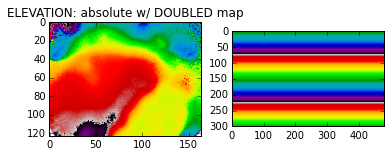

In [371]:
# elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.
elevation_phase = np.angle(downmap / upmap)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(elevation_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute w/ DOUBLED map')

fig.add_subplot(1,2,2)
plt.imshow(double_down_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)

In [372]:
#######################################
# Set THRESHOLD params:
#######################################

thresh = 0.3
log_thresh = 0.8
use_log = 0

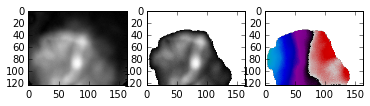

In [373]:

# V-LEFT:
# MASK WITH MAGNITUDE:
# LEFT

mag_mapL = D[leftkey]['mag_map']
fig = plt.figure()

###################################

fig.add_subplot(1,3,1)
plt.imshow(mag_mapL, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)

if use_log:
    [mx, my] = np.where(np.log(mag_mapL) >= log_thresh*np.log(mag_mapL.max()))
else:
    [mx, my] = np.where(mag_mapL >= thresh*mag_mapL.max())

maskL = np.ones(mag_mapL.shape) * 100
maskL[mx, my] = mag_mapL[mx, my]
[nullx, nully] = np.where(maskL == 100)
maskL[nullx, nully] = np.nan
maskL = np.ma.array(maskL)

plt.imshow(maskL, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)
phase_mapL = np.angle(leftmap)
# plt.imshow(phase_map)

phase_maskL = np.ones(mag_mapL.shape) * 100
phase_maskL[mx, my] = phase_mapL[mx, my]
phase_maskL[nullx, nully] = np.nan
phase_maskL = np.ma.array(phase_maskL)
plt.imshow(phase_maskL, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

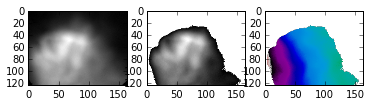

In [374]:
# V-RIGHT:  MASK WITH MAGNITUDE:
# RIGHT 

fig = plt.figure()
mag_mapR = D[rightkey]['mag_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_mapR, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_mapR) >= log_thresh*np.log(mag_mapR.max()))
else:
    [mx, my] = np.where(mag_mapR >= thresh*mag_mapR.max())

maskR = np.ones(mag_mapR.shape) * 100
maskR[mx, my] = mag_mapR[mx, my]
[nullx, nully] = np.where(maskR == 100)
maskR[nullx, nully] = np.nan
maskR = np.ma.array(maskR)

plt.imshow(maskR, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)
phase_mapR = np.angle(rightmap)
# plt.imshow(phase_map)

phase_maskR = np.ones(mag_mapR.shape) * 100
phase_maskR[mx, my] = phase_mapR[mx, my]
phase_maskR[nullx, nully] = np.nan
phase_maskR = np.ma.array(phase_maskR)
plt.imshow(phase_maskR, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

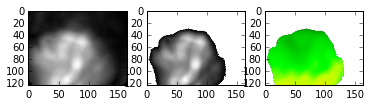

In [375]:
# MASK WITH MAGNITUDE:
# H-DOWN: 

fig = plt.figure()
mag_mapD = D[downkey]['mag_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_mapD, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_mapD) >= log_thresh*np.log(mag_mapD.max()))
else:
    [mx, my] = np.where(mag_mapD >= thresh*mag_mapD.max())

maskD = np.ones(mag_mapD.shape) * 100
maskD[mx, my] = mag_mapD[mx, my]
[nullx, nully] = np.where(maskD == 100)
maskD[nullx, nully] = np.nan
maskD = np.ma.array(maskD)

plt.imshow(maskD, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)
phase_mapD = np.angle(downmap)
# plt.imshow(phase_map)

phase_maskD = np.ones(mag_mapD.shape) * 100
phase_maskD[mx, my] = phase_mapD[mx, my]
phase_maskD[nullx, nully] = np.nan
phase_maskD = np.ma.array(phase_maskD)
plt.imshow(phase_maskD, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

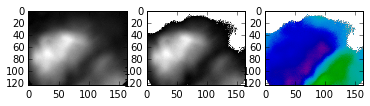

In [376]:
# MASK WITH MAGNITUDE:
# H-UP: 

log_thresh = 0.8
thresh = 0.5
use_log = 1

fig = plt.figure()
mag_mapU = D[upkey]['mag_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_mapU, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_mapU) >= log_thresh*np.log(mag_mapU.max()))
else:
    [mx, my] = np.where(mag_mapU >= thresh*mag_mapU.max())

maskU = np.ones(mag_mapU.shape) * 100
maskU[mx, my] = mag_mapU[mx, my]
[nullx, nully] = np.where(maskU == 100)
maskU[nullx, nully] = np.nan
maskU = np.ma.array(maskU)

plt.imshow(maskU, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)
phase_mapU = np.angle(upmap)
# plt.imshow(phase_map)

phase_maskU = np.ones(mag_mapU.shape) * 100
phase_maskU[mx, my] = phase_mapU[mx, my]
phase_maskU[nullx, nully] = np.nan
phase_maskU = np.ma.array(phase_maskU)
plt.imshow(phase_maskU, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)